# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div><div class="lev1"><a href="#Visualize-loops"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize loops</a></div>

In [ ]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [ ]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)
print(ts)


In [ ]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [ ]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


In [ ]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)

# Statistics of loop arrays.

In [ ]:
import collections


In [ ]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

In [ ]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

# Visualize loops

In [ ]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')

In [ ]:
loopviz.prepare_canvas(p['L'])

loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xlabel('chromosomal position')

# Testing simlef.pyx

In [4]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

In [48]:
p = {}
p['L'] = 200                  # 20000
p['N'] = 40
p['R_OFF'] = 1.0 / 1000.0       # 1.0 / 1000.0
p['R_EXTEND'] = float(0.005)      # 2.0
p['R_SHRINK'] = float(0.0001)      # 0.1

p['R_SWITCH'] = p['R_OFF'] * 10     # p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 600.0        # 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 600              # 200
p['PROCESS_NAME'] = b'proc'         # b'proc'

l_sites, r_sites, ts = simlef.simulate(p, verbose = True)
#l_sites, r_sites, ts = simlef.simulate(p)
#print(ts)



b'proc' 10 10053.107961207877 600000.0
b'proc' 20 20091.62417636235 600000.0
b'proc' 30 30131.195873608944 600000.0
b'proc' 40 40170.278216657054 600000.0
b'proc' 50 50233.25446253377 600000.0
b'proc' 60 60257.148624167836 600000.0
b'proc' 70 70316.09658622772 600000.0
b'proc' 80 80380.93559125307 600000.0
b'proc' 90 90412.70327689938 600000.0
b'proc' 100 100468.76297461179 600000.0
b'proc' 110 110514.07770644719 600000.0
b'proc' 120 120559.90576008112 600000.0
b'proc' 130 130597.86896162387 600000.0
b'proc' 140 140649.91619798457 600000.0
b'proc' 150 150690.9036246371 600000.0
b'proc' 160 160723.2400903571 600000.0
b'proc' 170 170772.83054220604 600000.0
b'proc' 180 180824.02001946716 600000.0
b'proc' 190 190875.2741438286 600000.0
b'proc' 200 200905.23952792454 600000.0
b'proc' 210 210944.58156783832 600000.0
b'proc' 220 220987.61428944126 600000.0
b'proc' 230 231037.62958872633 600000.0
b'proc' 240 241050.60722057484 600000.0
b'proc' 250 251075.52394204316 600000.0
b'proc' 260 26110

Number of -1 entries in l_sites: 94


(0.0, 400.0)

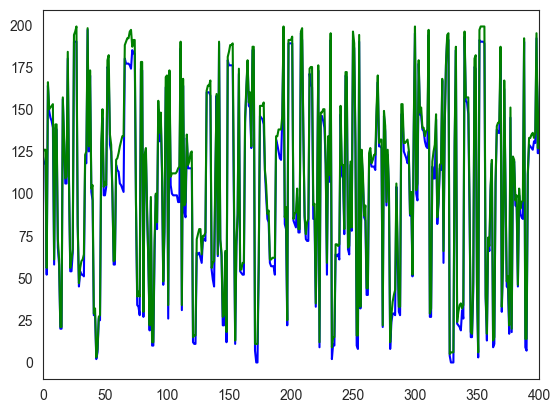

In [49]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of -1 entries in l_sites: {num_minus_ones}")

plt.xlim(0,400)

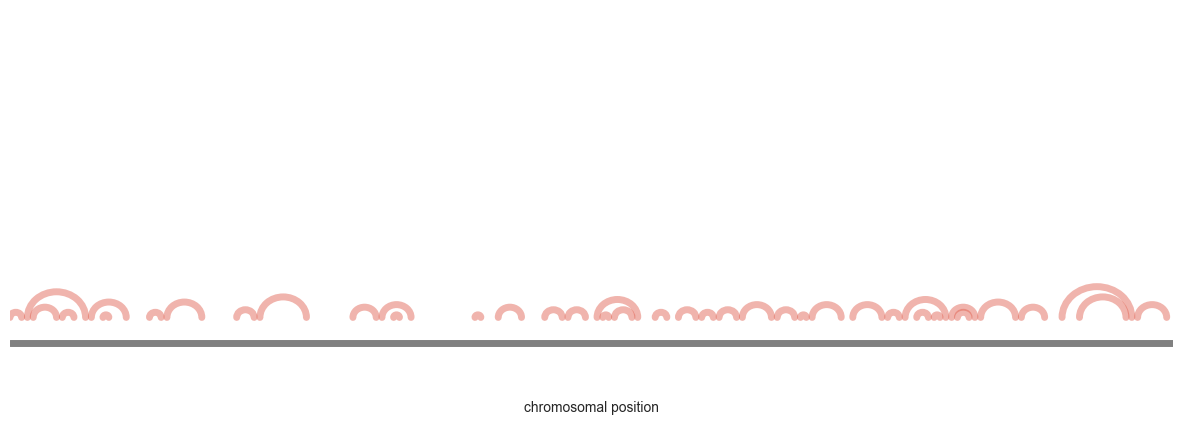

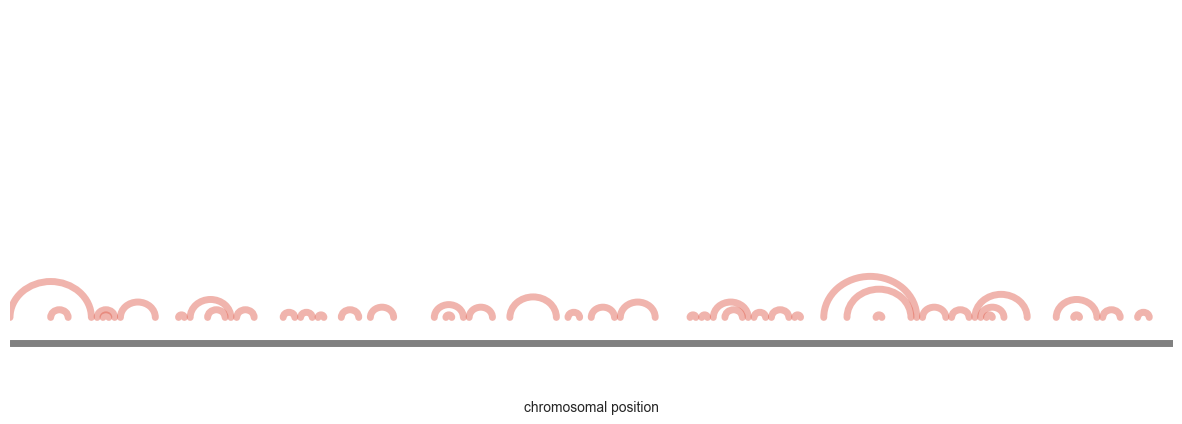

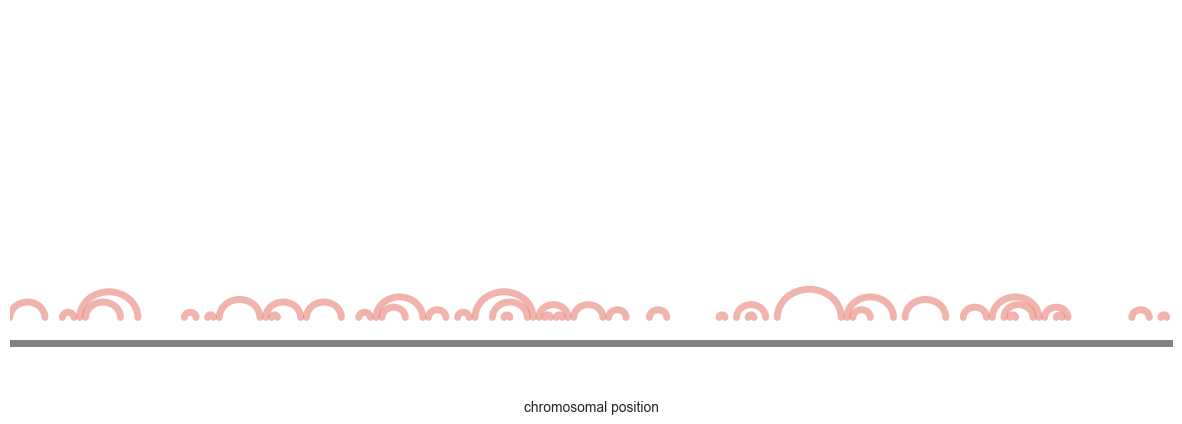

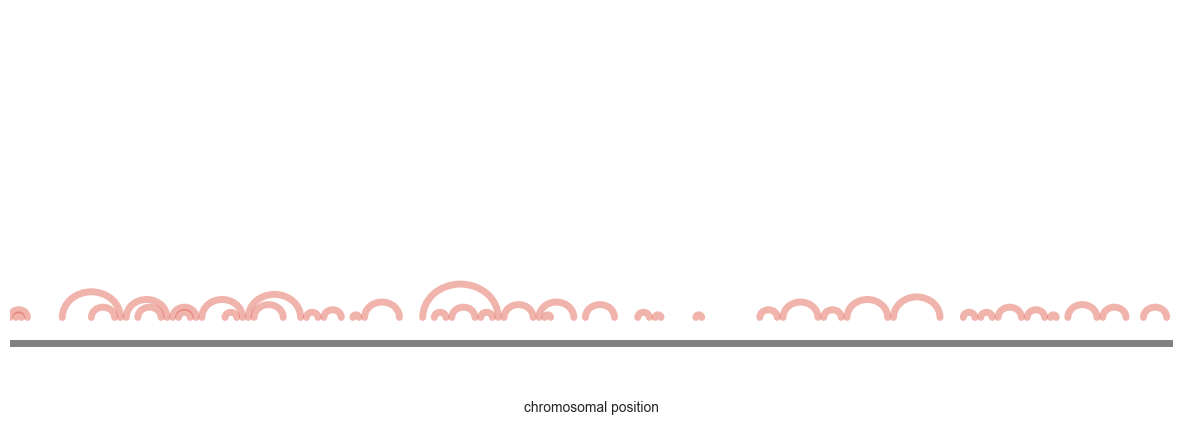

In [50]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=4)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')

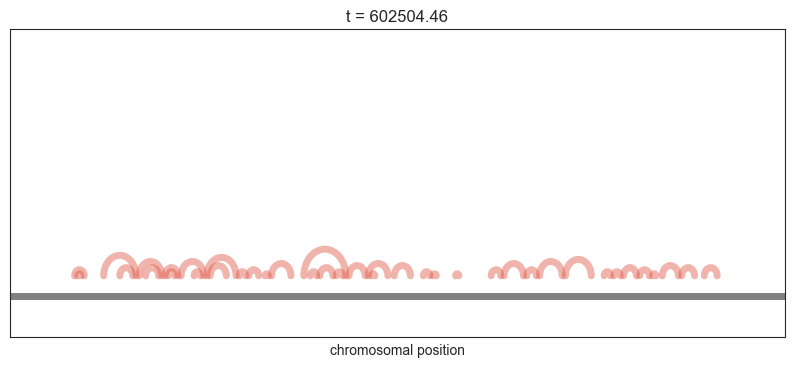

In [65]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))

def update(frame):
    ax.clear()
    ax.set_xlim(-20, p['L'] + 20)
    ax.set_ylim(-30, 120)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(-10, color='gray', lw=5, zorder=-1)
    ax.set_xlabel('chromosomal position')
    ax.set_title(f"t = {ts[frame]:.2f}")
    loopviz.plot_lefs(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        colors=[(223.0/255.0,90/255.0,73/255.0)] * 500,
        ax=ax,  # Pass ax!
        max_height=200,
        plot_text=False,
        height_factor=4
    )

ani = FuncAnimation(fig, update, frames=len(ts), interval=10)
ani.save("video_trial.mp4", writer="ffmpeg", fps=60)
plt.show()

## Analysis of Produced data

What is the data currently showing us?

### ChIP-Seq

My thoughts on how to compute ChIP-Seq... Well, just make a bin counter that counts how many times any leg goes through each of the L sites on the genome.

In [66]:
L = p['L']      # Number of sites
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of times -1 appears in l_sites: {num_minus_ones}")
print(L)

Number of times -1 appears in l_sites: 94
200


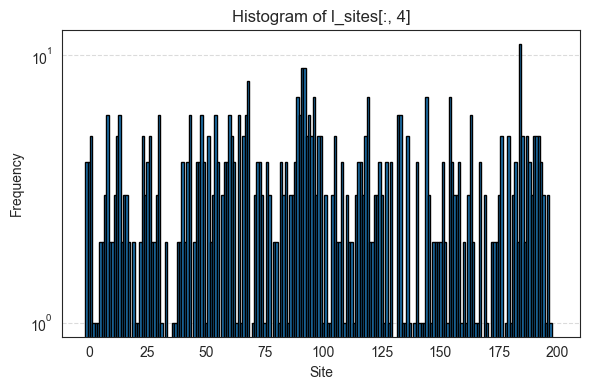

In [73]:
# Example: choose the column index you want to plot
i = 4  # change this to select another column

# Your array: l_sites should be of shape (n_snapshots, N)
# This selects column i
data = l_sites[:, i]

# Define the number of bins: from -1 to L-1 (inclusive), total of L+1 bins
bins = np.arange(-1.5, L + 0.5, 1)  # center bins around each integer

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.hist(data, bins=bins, edgecolor='black', align='mid')
plt.title(f'Histogram of l_sites[:, {i}]')
plt.xlabel('Site')
plt.ylabel('Frequency')
#plt.xticks(np.arange(-1, L))  # ticks at each integer value
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [70]:
print(f"First Analysis of data:\n")
print(f"Maximum values of l and r: {np.max(l_sites)} ; {np.max(r_sites)}")
print(f"Minumum values of l and r: {np.min(l_sites)} ; {np.min(r_sites)}")
print(f"Number of times either loop was detached: 0: {np.sum(l_sites[:,3] == -1)} ; 1: {np.sum(r_sites[:,4] == -1)}")


First Analysis of data:

Maximum values of l and r: 198 ; 199
Minumum values of l and r: -1 ; -1
Number of times either loop was detached: 0: 5 ; 1: 4


0.008136032795114198
0.008136032795114198


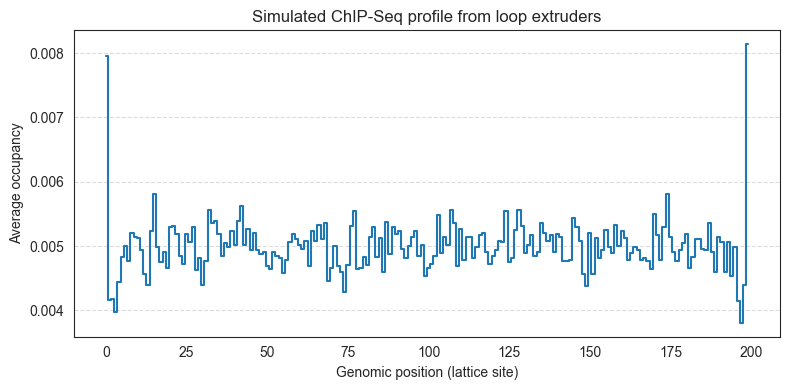

In [81]:
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

all_sites = np.concatenate((l_valid_sites,r_valid_sites))

# Count occurrences at each site from 0 to L-1
# np.bincount will count frequencies of values efficiently
chip_seq_counts = np.bincount(all_sites, minlength=L)

# Optional: normalize to get occupancy per time point
chip_seq_profile = chip_seq_counts / chip_seq_counts.sum()  # or / (T*N) if you want full density

print(chip_seq_profile[199])
print(np.sum(all_sites == 199)/len(all_sites))
# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(L), chip_seq_profile, drawstyle='steps-mid')
plt.title("Simulated ChIP-Seq profile from loop extruders")
plt.xlabel("Genomic position (lattice site)")
plt.ylabel("Average occupancy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Loop Size Distribution:

We can compute the loop sizes as the difference between l_site and r_site for each coordinate.

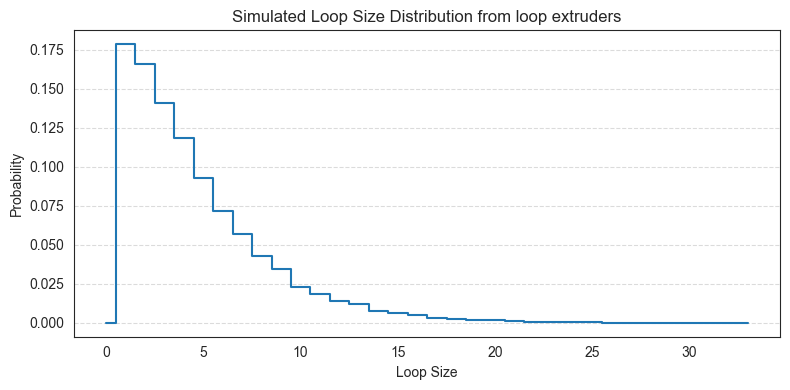

In [83]:
T, N = l_sites.shape

# Flatten the array and remove detached sites (-1)
l_valid_sites = l_sites[l_sites >= 0].flatten()
r_valid_sites = r_sites[r_sites >= 0].flatten()

loop_sizes = r_valid_sites - l_valid_sites
max_loop_size = np.max(loop_sizes[loop_sizes >= 0])+1  # Get the maximum loop size, ignoring detached loops
loop_dist  = np.bincount(loop_sizes[loop_sizes >= 0], minlength=max_loop_size)
loop_dist_normalized = loop_dist / loop_dist.sum()  # Normalize to get probability distribution


plt.figure(figsize=(8, 4))
plt.plot(np.arange(max_loop_size), loop_dist_normalized, drawstyle='steps-mid')
plt.title("Simulated Loop Size Distribution from loop extruders")
plt.xlabel("Loop Size")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Loading Site:
This quantity is fed to the system by us. I could try and modify simlef.pyx to include